## SIP spectra removal

In [1]:
import numpy as np
import pygimli as pg
from pygimli.physics import SIPSpectrum
from pygimli.physics.SIP import modelColeColeSigma

In [2]:
f1 = 2**np.arange(-7, 15, 1.)  # 
print(f1)
f2 = 1.5**np.arange(-12, 25, 1)
print(f2)

[7.8125e-03 1.5625e-02 3.1250e-02 6.2500e-02 1.2500e-01 2.5000e-01
 5.0000e-01 1.0000e+00 2.0000e+00 4.0000e+00 8.0000e+00 1.6000e+01
 3.2000e+01 6.4000e+01 1.2800e+02 2.5600e+02 5.1200e+02 1.0240e+03
 2.0480e+03 4.0960e+03 8.1920e+03 1.6384e+04]
[7.70734663e-03 1.15610199e-02 1.73415299e-02 2.60122949e-02
 3.90184423e-02 5.85276635e-02 8.77914952e-02 1.31687243e-01
 1.97530864e-01 2.96296296e-01 4.44444444e-01 6.66666667e-01
 1.00000000e+00 1.50000000e+00 2.25000000e+00 3.37500000e+00
 5.06250000e+00 7.59375000e+00 1.13906250e+01 1.70859375e+01
 2.56289062e+01 3.84433594e+01 5.76650391e+01 8.64975586e+01
 1.29746338e+02 1.94619507e+02 2.91929260e+02 4.37893890e+02
 6.56840836e+02 9.85261253e+02 1.47789188e+03 2.21683782e+03
 3.32525673e+03 4.98788510e+03 7.48182764e+03 1.12227415e+04
 1.68341122e+04]


In [3]:
# We define a Cole-Cole model
sigma = 0.1
m = 0.3
tau = 0.1
c = 0.5
eps0 = 8.854e-12
eps = 10000
s1 = modelColeColeSigma(f1, sigma, m, tau, c) + 1j * f1 * 2 * np.pi * eps *eps0
print(s1)
s2 = modelColeColeSigma(f2, sigma, m, tau, c) + 1j * f2 * 2 * np.pi * eps *eps0

[0.10211377+0.00192322j 0.10297704+0.00261116j 0.10417796+0.00348698j
 0.10582662+0.0045512j  0.10804058+0.00575843j 0.11091227+0.00699295j
 0.11445287+0.0080625j  0.11853163+0.00873778j 0.12285996+0.00884329j
 0.12706294+0.00834984j 0.13081002+0.00739177j 0.1339145 +0.00619317j
 0.13634498+0.00496854j 0.13817347+0.00386521j 0.13951386+0.00295909j
 0.14048098+0.0022802j  0.1411724 +0.00184645j 0.14166417+0.00169963j
 0.14201298+0.00195148j 0.14226001+0.0028596j  0.14243482+0.00497147j
 0.14255849+0.00940918j]


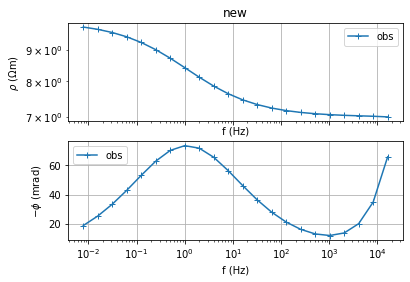

In [4]:
spec1 = SIPSpectrum(f=f1, amp=1./np.abs(s1), phi=np.angle(s1))
fig, ax = spec1.showData()

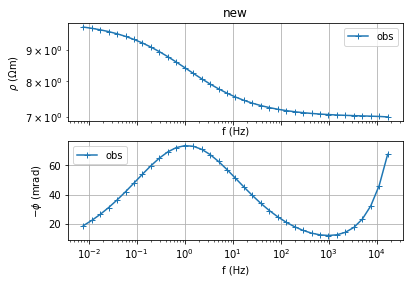

In [5]:
spec2 = SIPSpectrum(f=f2, amp=1./np.abs(s2), phi=np.angle(s2))
fig, ax = spec2.showData()

detected epsilon of  9737.54782845323


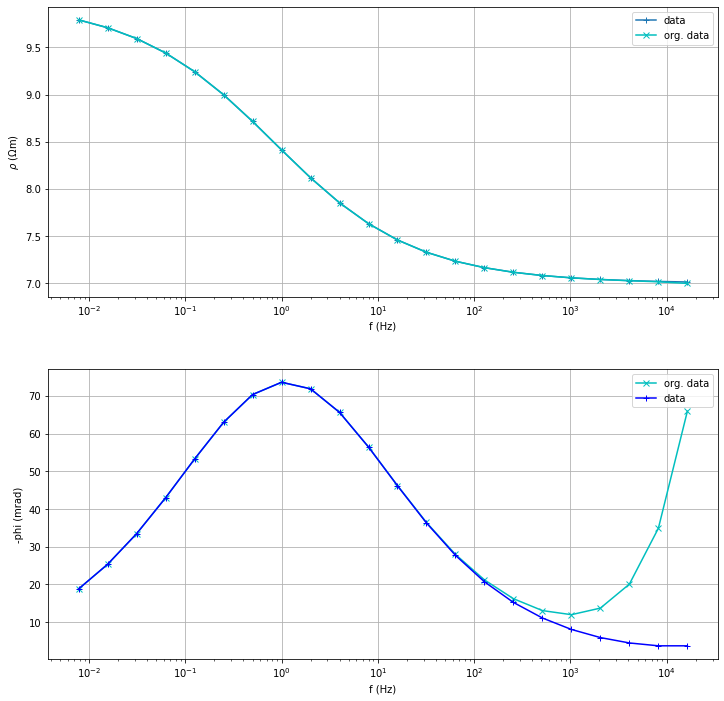

In [6]:
spec1.removeEpsilonEffect()
spec1.showAll();

detected epsilon of  9794.274159349963


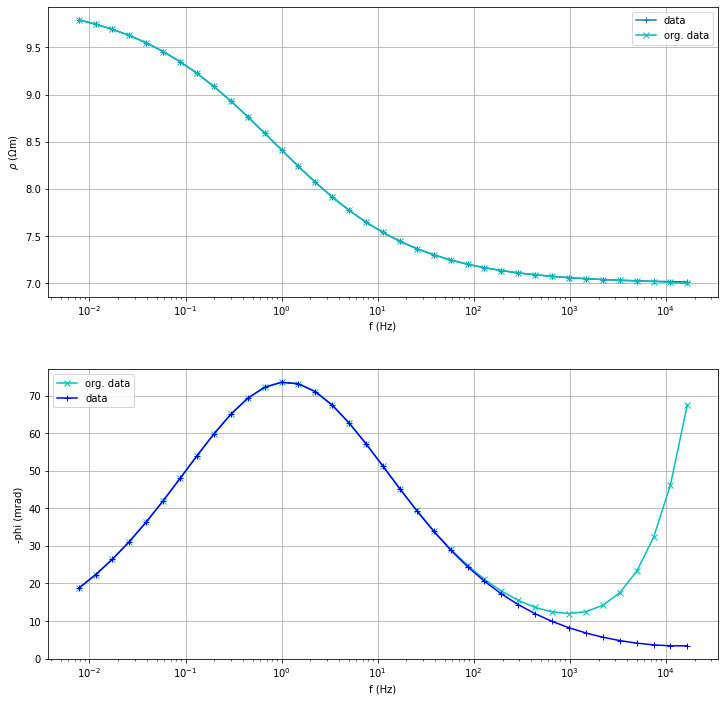

In [7]:
spec2.removeEpsilonEffect()
fig, ax = spec2.showAll();
ax[1].semilogx(spec1.f, spec1.phi*1000, "rx-", label="f1");
ax[1].legend()

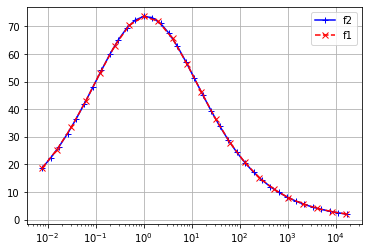

In [12]:
fig, ax = pg.plt.subplots()
ax.semilogx(spec2.f, spec2.phi*1000, "b+-", label="f2")
ax.semilogx(spec1.f, spec1.phi*1000, "rx--", label="f1")
ax.grid()
ax.legend();

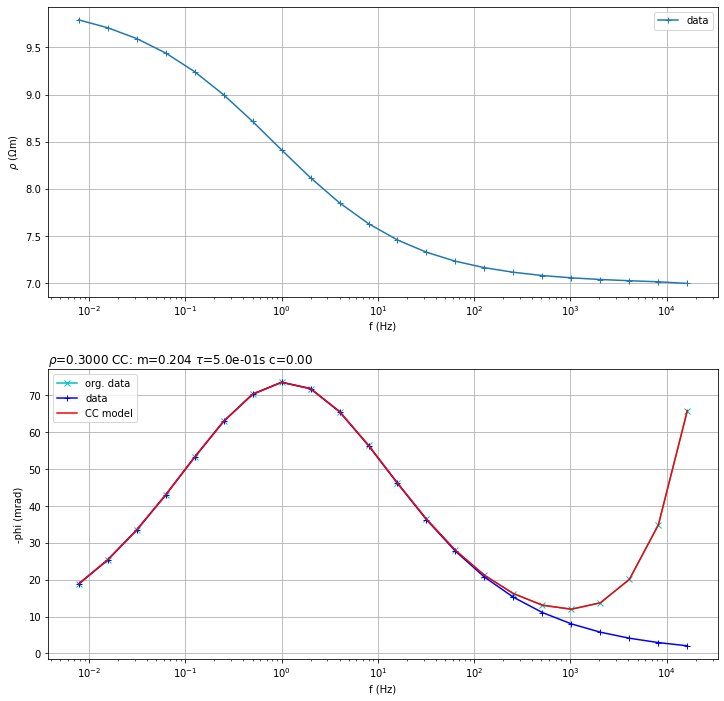

In [9]:
spec1 = SIPSpectrum(f=f1, amp=1./np.abs(s1), phi=np.angle(s1))
spec1.fitCCEM()
spec1.showAll();

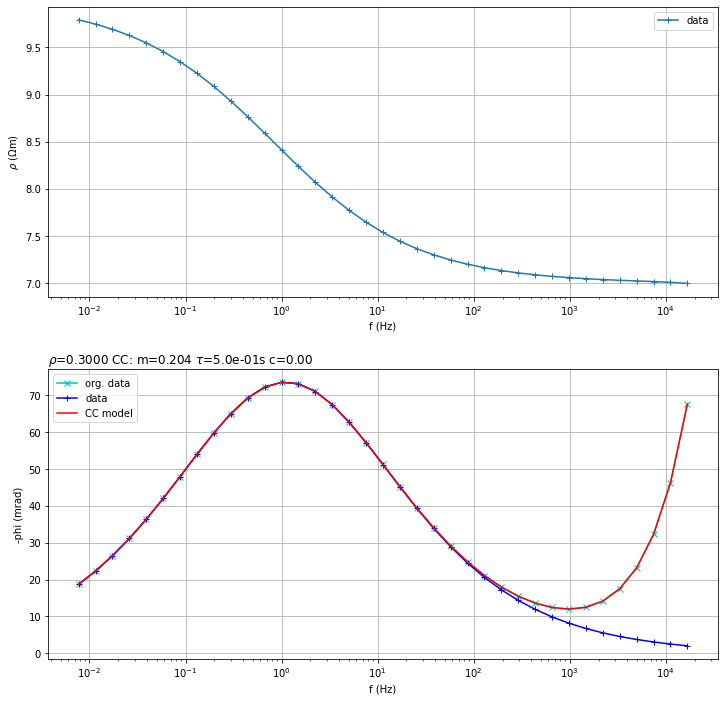

(<Figure size 864x864 with 2 Axes>,
 array([<AxesSubplot:xlabel='f (Hz)', ylabel='$\\rho$ ($\\Omega$m)'>,
        <AxesSubplot:title={'left':'$\\rho$=0.3000 CC: m=0.204 $\\tau$=5.0e-01s c=0.00 '}, xlabel='f (Hz)', ylabel='-phi (mrad)'>],
       dtype=object))

In [10]:
spec2 = SIPSpectrum(f=f2, amp=1./np.abs(s2), phi=np.angle(s2))
spec2.fitCCEM()
spec2.showAll()

ARMS= 0.00156328072171167 RRMS= 0.5530302973788022


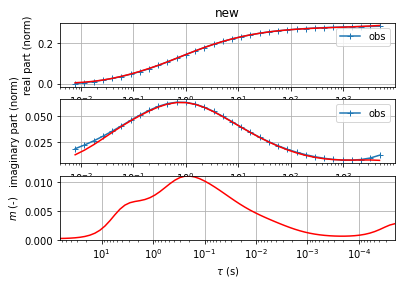

In [19]:
spec2 = SIPSpectrum(f=f2, amp=1./np.abs(s2), phi=np.angle(s2))
spec2.removeEpsilonEffect(er=3000)
spec2.cutF(6000)
spec2.fitDebyeModel(showFit=True)
# spec2.showData()